In [21]:
import pandas as pd

data = pd.read_csv("/Volumes/Mac/DatasetSP/preprocessed/combined_dataset.csv")

display(data.head())
display(data.describe())
display(data.info())

,X,Y,Z,Subject,Test,Trial,Bout,Position,Sensor
0,-9.184573,-1.293460,-23.679140,15,10,4,19,2,2
1,-10.662604,3.742293,-29.467398,15,10,4,19,2,2
2,-9.934727,7.231469,-34.095785,15,10,4,19,2,2
3,-11.820318,9.267934,-37.317568,15,10,4,19,2,2
4,-16.592589,11.439007,-37.438764,15,10,4,19,2,2


,X,Y,Z,Subject,Test,Trial,Bout,Position,Sensor
count,3.308387e+07,3.308387e+07,3.308387e+07,3.308387e+07,3.308387e+07,3.308387e+07,3.308387e+07,3.308387e+07,33083870.0
mean,1.985603e+00,6.308458e-01,-5.067779e-01,1.098353e+01,9.507830e+00,3.540173e+00,1.386665e+01,2.447029e+00,1.5
std,4.737639e+01,5.334057e+01,3.565786e+01,7.555066e+00,1.270847e+00,1.055149e+00,1.206110e+01,1.704941e+00,0.5
min,-1.146740e+03,-1.146565e+03,-1.146740e+03,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.0
25%,-8.966019e+00,-7.062935e+00,-5.192921e+00,3.000000e+00,1.000000e+01,4.000000e+00,3.000000e+00,1.000000e+00,1.0
50%,4.846773e+00,3.273733e-01,-5.717805e-01,9.000000e+00,1.000000e+01,4.000000e+00,1.000000e+01,2.000000e+00,1.5
75%,1.112189e+01,9.004566e+00,4.525622e+00,1.700000e+01,1.000000e+01,4.000000e+00,2.400000e+01,4.000000e+00,2.0
max,1.146740e+03,1.146740e+03,9.167756e+02,2.500000e+01,1.000000e+01,4.000000e+00,7.200000e+01,5.000000e+00,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33083870 entries, 0 to 33083869
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   Subject   int64  
 4   Test      int64  
 5   Trial     int64  
 6   Bout      int64  
 7   Position  int64  
 8   Sensor    int64  
dtypes: float64(3), int64(6)
memory usage: 2.2 GB


None

In [22]:
print(data.info(memory_usage="deep"))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33083870 entries, 0 to 33083869
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   Subject   int64  
 4   Test      int64  
 5   Trial     int64  
 6   Bout      int64  
 7   Position  int64  
 8   Sensor    int64  
dtypes: float64(3), int64(6)
memory usage: 2.2 GB
None


In [23]:
data["Test"] = data["Test"].astype("int8")  # Colonna Test
data["Trial"] = data["Trial"].astype("int8")  # Colonna Trial
data["Sensor"] = data["Sensor"].astype("int8")  # Colonna Sensor
data["Position"] = data["Position"].astype("int8")  # Posizione ha pochi valori unici
data["Bout"] = data["Bout"].astype("int16")  # Bout ha valori piccoli

print(data.info(memory_usage="deep"))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33083870 entries, 0 to 33083869
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   Subject   int64  
 4   Test      int8   
 5   Trial     int8   
 6   Bout      int16  
 7   Position  int8   
 8   Sensor    int8   
dtypes: float64(3), int16(1), int64(1), int8(4)
memory usage: 1.2 GB
None


In [24]:
position_counts = data["Position"].value_counts()

print(position_counts)

Position
0    5720772
2    5670492
1    5670492
3    5425970
4    5312914
5    5283230
Name: count, dtype: int64


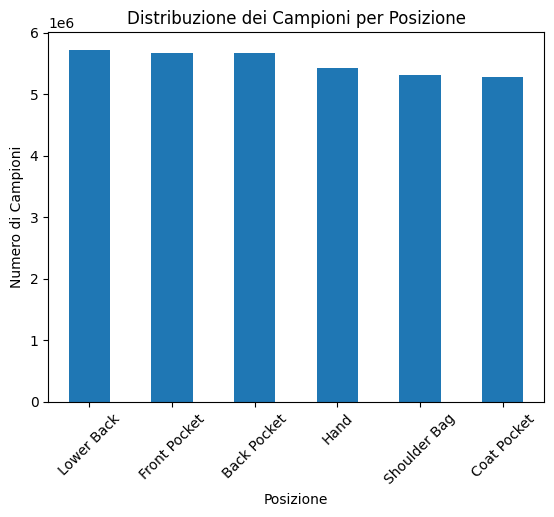

In [25]:
import matplotlib.pyplot as plt
position_counts.plot(kind="bar", title="Distribuzione dei Campioni per Posizione")
plt.xlabel("Posizione")
plt.ylabel("Numero di Campioni")
plt.xticks(ticks=range(len(position_counts)), labels=["Lower Back", "Front Pocket", "Back Pocket", "Hand", "Shoulder Bag", "Coat Pocket"], rotation=45)
plt.show()

In [26]:
bout_per_position = data.groupby(["Subject", "Position", "Test", "Trial", "Bout"]).size().reset_index()
position_counts = bout_per_position.groupby("Position").size()

# Mostra i risultati
print("Numero di walking bout per posizione:")
print(position_counts)


Numero di walking bout per posizione:
Position
0    645
1    621
2    621
3    519
4    499
5    522
dtype: int64


In [7]:
# Seleziona un soggetto specifico
subject_id = 17  # Cambia con l'ID del soggetto desiderato
subject_data = data[data["Subject"] == subject_id]

# Conta i walking bout unici per posizione
bout_per_position = subject_data.groupby(["Position", "Test", "Trial", "Bout"]).size().reset_index()
position_counts = bout_per_position.groupby("Position").size()

# Mostra i risultati
print(f"Numero di walking bout per posizione per il soggetto {subject_id}:")
print(position_counts)


Numero di walking bout per posizione per il soggetto 17:
Position
0    39
1    39
2    35
3    29
4    39
5    32
dtype: int64


In [27]:
# Crea una colonna che identifica i cambi di sensore
data["Sensor_Change"] = data["Sensor"] != data["Sensor"].shift()

# Visualizza le righe dove il sensore cambia
print(data[data["Sensor_Change"]])

                  X          Y          Z  Subject  Test  Trial  Bout  \
0         -9.184573  -1.293460 -23.679140       15    10      4    19   
5578      -9.072355   2.715275   3.516798       15    10      4    12   
7196       9.555000 -49.980001 -20.300000       15     5      3     1   
7893       9.516663  -4.751321  -0.231034       15    10      4     3   
57693    -17.158626   9.495543  -3.534042       15    10      4    27   
...             ...        ...        ...      ...   ...    ...   ...   
33076021   4.791554  10.251594   4.451716        2    10      4    33   
33080716   7.548117  -4.540772  15.129644        2    10      4    29   
33081209   5.847838  -4.056975 -10.256761        2     6      1     1   
33081590 -14.892865  19.909968  46.549647        2    10      4    30   
33082806  11.955846   6.034984  -9.207302        2     5      2     1   

          Position  Sensor  Sensor_Change  
0                2       2           True  
5578             3       1         

In [35]:
# Ordina i dati per Subject, Trial, Bout, Sensor, e poi per indice
df = data.sort_values(by=["Subject", "Test", "Trial", "Bout", "Position", "Sensor"]).reset_index(drop=True)

In [36]:
print(df.head(50))

            X         Y         Z  Subject  Test  Trial  Bout  Position  \
0    9.363723  0.754174 -1.788469        1     4      1     1         0   
1    9.375694  0.842759 -1.793257        1     4      1     1         0   
2    9.527327  0.757366 -1.889823        1     4      1     1         0   
3    9.794679  0.524330 -2.061408        1     4      1     1         0   
4   10.086772  0.177171 -2.303222        1     4      1     1         0   
5   10.553641 -0.322020 -2.644396        1     4      1     1         0   
6   10.918757 -0.751779 -2.955642        1     4      1     1         0   
7   11.287863 -1.282494 -3.327142        1     4      1     1         0   
8   11.580753 -1.628057 -3.550601        1     4      1     1         0   
9   11.828554 -1.783680 -3.752911        1     4      1     1         0   
10  11.874044 -1.771709 -3.781641        1     4      1     1         0   
11  11.790247 -1.567005 -3.672705        1     4      1     1         0   
12  11.542446 -1.194707 -

In [33]:
grouped = df.groupby(["Subject", "Test", "Trial", "Bout", "Position", "Sensor"])

In [34]:
display(grouped.size().head())

Subject  Test  Trial  Bout  Position  Sensor
1        4     1      1     0         1         1195
                                      2         1195
                            1         1         1195
                                      2         1195
                            2         1         1195
dtype: int64

In [24]:
# Mostra i valori univoci di Bout per Subject, Test e Trial
print(df.groupby(["Subject", "Test", "Trial"])["Bout"].unique())

Subject  Test  Trial
1        4     1                                                      [1]
               2                                                      [1]
               3                                                      [1]
         5     1                                                      [1]
               2                                                      [1]
                                              ...                        
25       6     3                                                      [1]
         7     1                                                      [1]
         8     1                                                      [1]
         9     1                                                      [1]
         10    4        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Name: Bout, Length: 195, dtype: object


In [32]:
# Mostra la dimensione di ciascun gruppo creato
print(grouped.size().reset_index(name="Counts"))

      Subject  Test  Trial  Bout  Sensor  Counts
0           1     4      1     1       1    7170
1           1     4      1     1       2    7170
2           1     4      2     1       1    7380
3           1     4      2     1       2    7380
4           1     4      3     1       1    7080
...       ...   ...    ...   ...     ...     ...
1285       25    10      4    24       2  170814
1286       25    10      4    25       1   17940
1287       25    10      4    25       2   17940
1288       25    10      4    26       1    3180
1289       25    10      4    26       2    3180

[1290 rows x 6 columns]
